In [115]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [116]:
df = pd.read_csv("../assets/data/data.csv")

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [117]:
df.columns

Index(['Date_Time', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'Year', 'z_LATITUDE', 'z_LONGITUDE'],
      dtype='object')

In [118]:
data = df[['Date_Time', 'BOROUGH', 'Year', 'COLLISION_ID']]
data_Brok = data.loc[data.BOROUGH == "BROOKLYN"]
data_Brok['Date_Time'] = pd.to_datetime(data_Brok['Date_Time'])
data_Brok["Weekday"] = data_Brok.Date_Time.dt.dayofweek < 5
data_Brok["hour"] = data_Brok.Date_Time.dt.hour
data_Brok['Weekday'] = data_Brok['Weekday'].replace({True: 'Business Days', False: 'Weekends'})
grouped_count = data_Brok.groupby(["Year", "hour", "Weekday"]).count()["COLLISION_ID"].unstack()

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

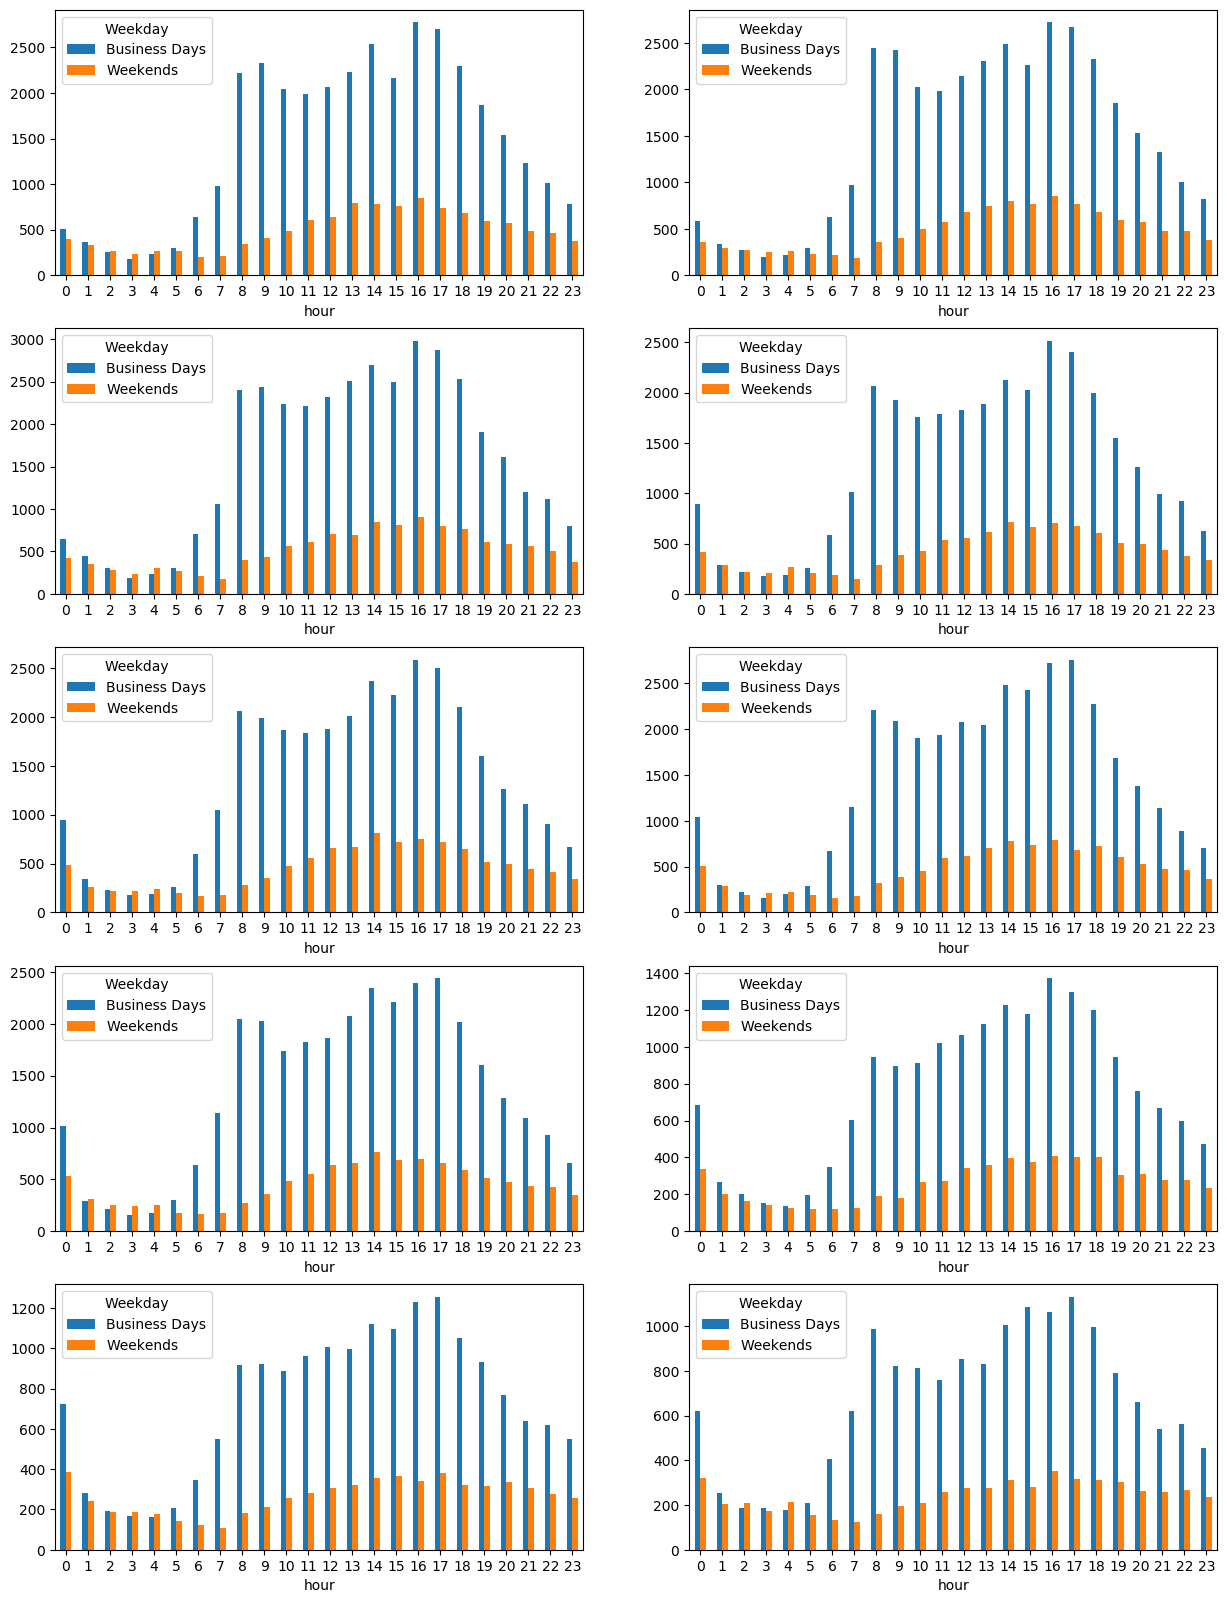

In [119]:
years = list(range(2013,2023))
fig, ax = plt.subplots(figsize=(15, 20))
for i, year in enumerate(years):
    plt.subplot(5, 2, i+1)  # set the subplot position
    grouped_count.loc[year].plot(kind='bar', ax=plt.gca(), rot=0)


In [120]:
# Create a DataFrame that contains the number of weekdays and weekends for each year
days_count = data_Brok.groupby(["Year", "Weekday"])["COLLISION_ID"].nunique().unstack()
days_count.columns = ["Business Days", "Weekends"]
normalized_collision = grouped_count / days_count

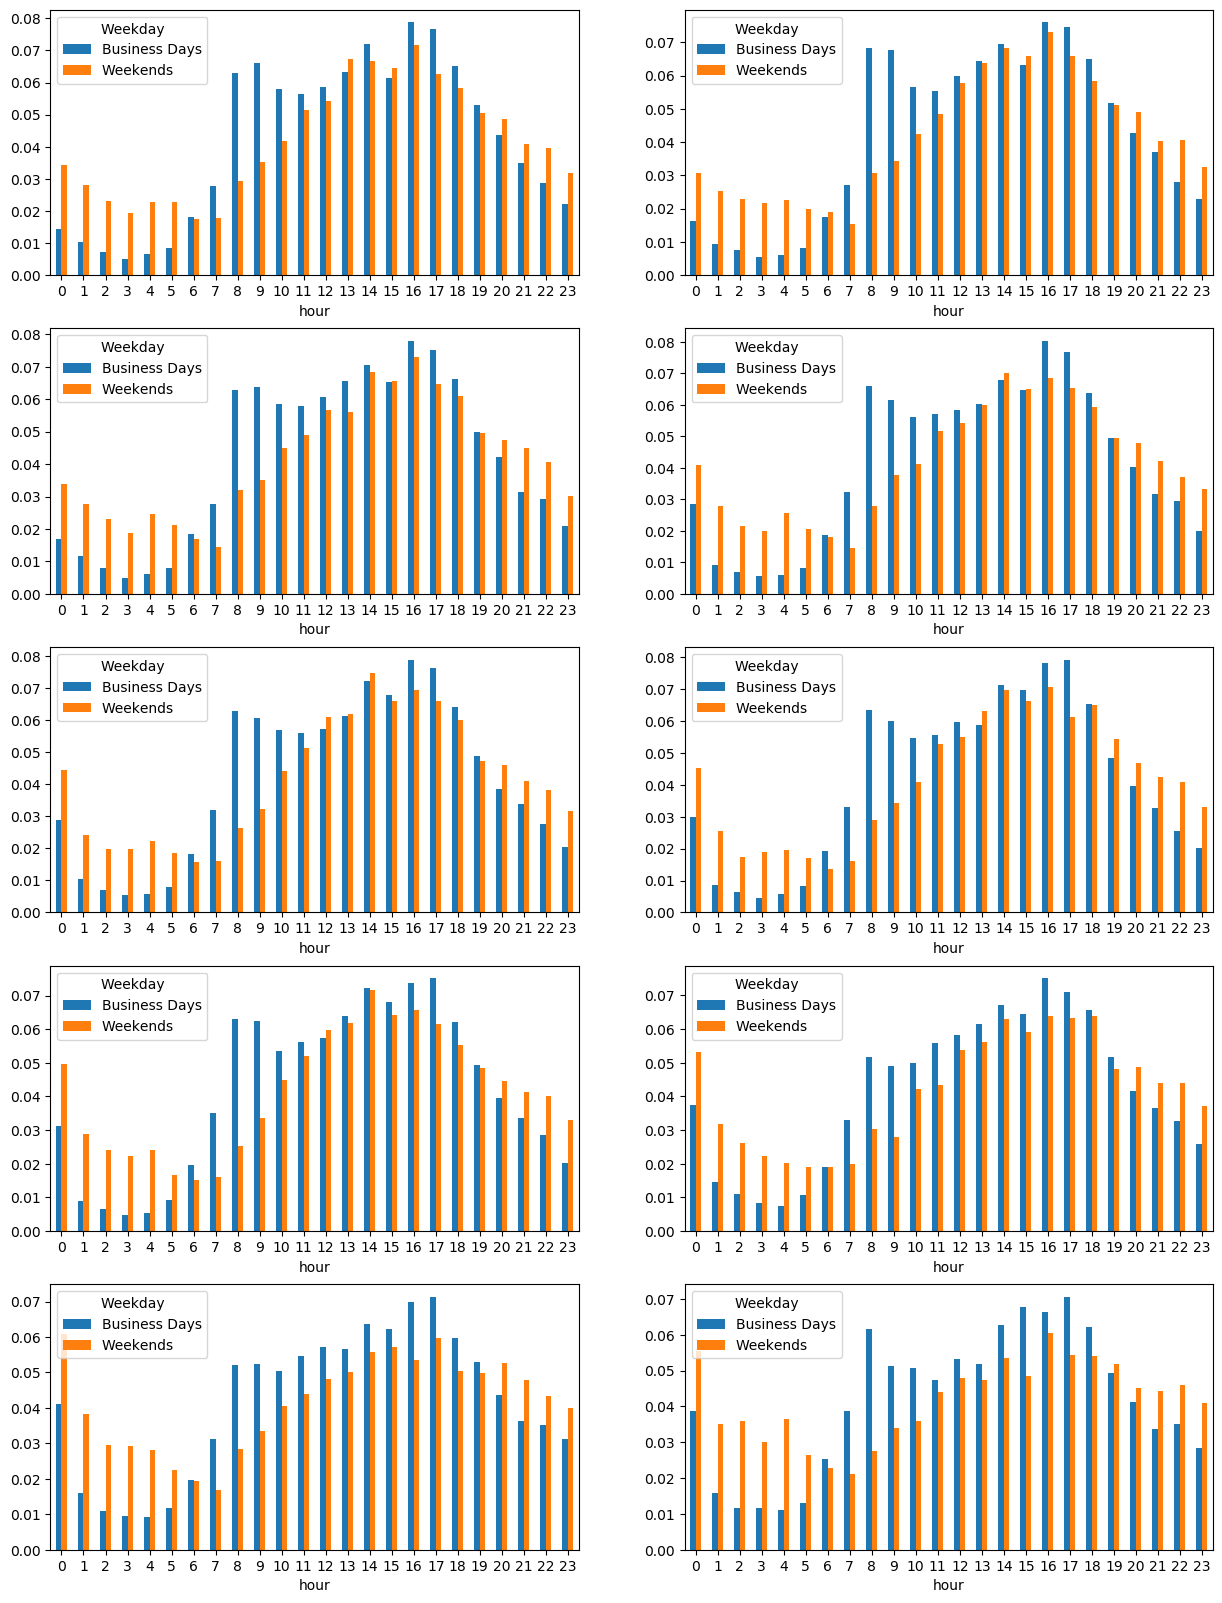

In [121]:
years = list(range(2013,2023))
fig, ax = plt.subplots(figsize=(15, 20))
for i, year in enumerate(years):
    plt.subplot(5, 2, i+1)  # set the subplot position
    normalized_collision.loc[year].plot(kind='bar', ax=plt.gca(), rot=0)

In [125]:
data_Brok = data
data_Brok['Date_Time'] = pd.to_datetime(data_Brok['Date_Time'])
data_Brok["Weekday"] = data_Brok.Date_Time.dt.dayofweek < 5
data_Brok["hour"] = data_Brok.Date_Time.dt.hour
data_Brok['Weekday'] = data_Brok['Weekday'].replace({True: 'Business Days', False: 'Weekends'})
data_bor = data_Brok.groupby(["Year", "BOROUGH", "hour", "Weekday"]).count()["COLLISION_ID"].unstack()
data_bor

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Weekday                  Business Days  Weekends
Year BOROUGH       hour                         
2013 BRONX         0               236       186
                   1               167       142
                   2               112       122
                   3                81       112
                   4                98       131
...                                ...       ...
2022 STATEN ISLAND 19               75        36
                   20               66        30
                   21               71        26
                   22               65        21
                   23               49        28

[1200 rows x 2 columns]

In [126]:
days_count = data_Brok.groupby(["Year", "Weekday"])["COLLISION_ID"].nunique().unstack()
days_count.columns = ["Business Days", "Weekends"]
data_bor_norm = data_bor / days_count
data_bor_norm.loc[2013, "BRONX"]

Weekday,Business Days,Weekends
hour,,
0,0.002032,0.004704
1,0.001438,0.003591
2,0.000964,0.003085
3,0.000697,0.002832
4,0.000844,0.003313
5,0.000921,0.002883
6,0.002221,0.002504
7,0.004262,0.001897
8,0.010212,0.004072


In [127]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

hours = list(range(0, 24))
years = list(range(2013, 2023))
boroughs = list(data.BOROUGH.unique())
colors = {'Business Days':'steelblue',
          'Weekends Days':'firebrick'}


fig = make_subplots(rows=5, cols=2, shared_yaxes=True, shared_xaxes=True, subplot_titles=years)

for i, year in enumerate(years):
    for j, bor in enumerate(boroughs):
        # Set the column index
        column_idx  = 1 if i%2==0 else 2
        row_idx = i//2+1
        fig.add_trace(go.Bar(x=hours, y=data_bor_norm.loc[year, bor]["Business Days"], marker_color=colors["Business Days"], visible=(j==0), name='Business Days' if i==0 else '', showlegend=True if i==0 else False), row=row_idx, col=column_idx)
        fig.add_trace(go.Bar(x=hours, y=data_bor_norm.loc[year, bor]["Weekends"], marker_color=colors["Weekends Days"], visible=(j==0), name='Weekends Days' if i==0 else '', showlegend=True if i==0 else False), row=row_idx, col=column_idx)
    

fig.update_layout(width=1200, height=1600,coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.update_layout(
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label=borough, method="update", args=[{"visible": [((j==i*2) or (j==i*2+1)) for j in range(len(boroughs)*2)]}, {"title": "Normalized Collision Count by Hour for " + borough}])
                    for i, borough in enumerate(boroughs)
                ]),
                x=0.05, y=1.1, xanchor="left", yanchor="top"
            )
        ],
        title_text="Normalized Collision Count by Hour for " + boroughs[0],
        title_x=0.5
    )
fig.update_xaxes(title_text="Hour of day", tickmode="array", tickvals=list(range(24)), ticktext=[f"{h:02d}:00" for h in range(24)])


fig.show()
fig.write_html("../assets/images/analysis/hor_by_borough.html")

In [128]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

hours = list(range(0, 23))
years = list(range(2013, 2023))
boroughs = list(data.BOROUGH.unique())
colors = {'Business Days':'steelblue',
          'Weekends Days':'firebrick'}


fig = make_subplots(rows=5, cols=2, shared_yaxes=True, subplot_titles=years)

for i, year in enumerate(years):
    for j, bor in enumerate(boroughs):
        # Set the column index
        column_idx  = 1 if i%2==0 else 2
        row_idx = i//2+1
        fig.add_trace(go.Bar(x=hours, y=data_bor.loc[year, bor]["Business Days"], marker_color=colors["Business Days"], visible=(j==0), name='Business Days' if i==0 else '', showlegend=True if i==0 else False), row=row_idx, col=column_idx)
        fig.add_trace(go.Bar(x=hours, y=data_bor.loc[year, bor]["Weekends"], marker_color=colors["Weekends Days"], visible=(j==0), name='Weekends Days' if i==0 else '', showlegend=True if i==0 else False), row=row_idx, col=column_idx)
    

fig.update_layout(width=1000, height=1200,coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.update_layout(
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label=borough, method="update", args=[{"visible": [((j==i*2) or (j==i*2+1)) for j in range(len(boroughs)*2)]}])
                    for i, borough in enumerate(boroughs)
                ]),
                x=0.05, y=1.1, xanchor="left", yanchor="top"
            )
        ],
        title_text="Collision Count by Hour for Brooklyn",
        title_x=0.5
    )
fig.show()



In [129]:
data_Brok = data
data_Brok['Date_Time'] = pd.to_datetime(data_Brok['Date_Time'])
data_Brok["Weekday"] = data_Brok.Date_Time.dt.dayofweek < 5
data_Brok["hour"] = data_Brok.Date_Time.dt.hour
data_Brok['Weekday'] = data_Brok['Weekday'].replace({True: 'Business Days', False: 'Weekends'})
data_Brok["Month"] = data_Brok["Date_Time"].dt.month
data_Brok["Day"] = data_Brok["Date_Time"].dt.day

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [15]:
df_brook_filter = data_Brok.loc[data_Brok.BOROUGH == "BROOKLYN"].loc[data_Brok.Year==2014]
df_brook_fil_group = df_brook_filter.groupby(["Month", "Day"]).count()["COLLISION_ID"]


Month  Day
1      1       92
       2      153
       3       92
       4      103
       5       73
             ... 
12     27     104
       28      82
       29     100
       30     122
       31     114
Name: COLLISION_ID, Length: 365, dtype: int64

In [130]:
df_brook = pd.read_csv("Brooklyn 2014-01-01 to 2015-12-31.csv")
df_brook['datetime'] = pd.to_datetime(df_brook['datetime'])
df_brook["Year"] = df_brook["datetime"].dt.year
df_brook["Month"] = df_brook["datetime"].dt.month
df_brook["Day"] = df_brook["datetime"].dt.day

In [131]:
df_brook_fore = df_brook[['Year', "Month", "Day", 'tempmax', 'tempmin', 'temp', 'humidity', 'precip', "snow", "visibility"]]
df_brook_fore = df_brook_fore.loc[df_brook_fore.Year==2014].groupby(["Month", "Day"]).sum()


In [137]:
df_brook_fil_group[2014]

Month  Day
1      1       92
       2      153
       3       92
       4      103
       5       73
             ... 
12     27     104
       28      82
       29     100
       30     122
       31     114
Name: COLLISION_ID, Length: 365, dtype: int64

In [136]:
df_brook_fore

Year  tempmax  tempmin  temp  humidity  precip  snow  visibility
Month Day                                                                  
1     1    2014      0.8     -4.1  -1.7      49.1   0.000   0.0        16.0
      2    2014      0.5     -7.0  -2.9      74.7   2.767   0.2        12.2
      3    2014     -7.7    -12.0 -10.2      62.9   3.185   0.1         9.3
      4    2014     -2.3    -12.7  -7.5      47.9   0.000   0.0        16.0
      5    2014      3.7     -3.0  -0.2      80.1   1.427   0.0         7.5
...         ...      ...      ...   ...       ...     ...   ...         ...
12    27   2014     12.9      6.5   9.1      51.5   0.000   0.0        16.0
      28   2014     11.5      6.5   9.0      65.2   2.615   0.0        14.7
      29   2014      6.5      1.9   4.3      46.1   0.000   0.0        16.0
      30   2014      1.3     -2.1  -0.5      48.1   0.000   0.0        16.0
      31   2014     -0.2     -2.8  -1.4      41.6   0.000   0.0        16.0

[365 rows x 8 columns]

In [138]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

months = list(range(1,13))
colors = {'Collisions':'steelblue',
          'Visibility':'firebrick'}


fig = make_subplots(rows=6, cols=2, shared_yaxes=False, subplot_titles=months)

for i, mon in enumerate(months):
    column_idx  = 1 if i%2==0 else 2
    row_idx = i//2+1
    days = list(range(1,len(df_brook_fil_group[2014][mon])+1))
    fig.add_trace(go.Bar(x=days, y=df_brook_fil_group[2014][mon], marker_color=colors["Collisions"], 
                         name='Collisions' if i==0 else '', showlegend=True if i==0 else False), 
                         row=row_idx, col=column_idx)
    fig.add_trace(go.Scatter(x=days, y=df_brook_fore["visibility"][mon], 
                             marker_color=colors["Visibility"], name='Visibility' if i==0 else '', 
                             showlegend=True if i==0 else False), row=row_idx, col=column_idx)
    
fig.update_layout(width=1000, height=1200,coloraxis=dict(colorscale='Bluered_r'), showlegend=True)

fig.show()


In [139]:
df_brook_fore

Year  tempmax  tempmin  temp  humidity  precip  snow  visibility
Month Day                                                                  
1     1    2014      0.8     -4.1  -1.7      49.1   0.000   0.0        16.0
      2    2014      0.5     -7.0  -2.9      74.7   2.767   0.2        12.2
      3    2014     -7.7    -12.0 -10.2      62.9   3.185   0.1         9.3
      4    2014     -2.3    -12.7  -7.5      47.9   0.000   0.0        16.0
      5    2014      3.7     -3.0  -0.2      80.1   1.427   0.0         7.5
...         ...      ...      ...   ...       ...     ...   ...         ...
12    27   2014     12.9      6.5   9.1      51.5   0.000   0.0        16.0
      28   2014     11.5      6.5   9.0      65.2   2.615   0.0        14.7
      29   2014      6.5      1.9   4.3      46.1   0.000   0.0        16.0
      30   2014      1.3     -2.1  -0.5      48.1   0.000   0.0        16.0
      31   2014     -0.2     -2.8  -1.4      41.6   0.000   0.0        16.0

[365 rows x 8 columns]

In [142]:
fig = make_subplots(rows=6, cols=2, specs=[[{"secondary_y": True}, {"secondary_y": True}],
                                            [{"secondary_y": True}, {"secondary_y": True}],
                                             [{"secondary_y": True}, {"secondary_y": True}],
                                              [{"secondary_y": True}, {"secondary_y": True}],
                                               [{"secondary_y": True}, {"secondary_y": True}],
                                                [{"secondary_y": True}, {"secondary_y": True}],
                                            ])

# condition = "snow"
colors = {"Collisions": "#FFA07A",
          "tempmax": "#FF0000",
          "tempmin": "#00FF00",
          "temp": "#7EC0EE",
          "humidity": "#808080",
          "precip": "#E389B9",
          "snow": "#800080",
          "visibility": "#000000",
          }


forecast = list(df_brook_fore.columns[1:])
months = list(range(1,13))

for i, mon in enumerate(months):
    for j, condition in enumerate(forecast):
        column_idx  = 1 if i%2==0 else 2
        row_idx = i//2+1

        days = list(range(1, len(df_brook_fil_group[2014][mon]) + 1))
        fig.add_trace(go.Bar(x=days, y=df_brook_fil_group[2014][mon], marker_color=colors["Collisions"], visible=(j == 0),
                            name='Collisions' if i == 0 else '', showlegend=True if i == 0 else False),
                            row=row_idx, col=column_idx)
        fig.add_trace(go.Scatter(x=days, y=df_brook_fore[condition][mon], visible=(j == 0),
                                marker_color=colors[condition], name=condition if i == 0 else '',
                                showlegend=True if i == 0 else False), row=row_idx, col=column_idx, secondary_y=True)

        fig.update_yaxes(title_text="Collisions", row=row_idx, col=column_idx, secondary_y=False, showgrid=False)
        fig.update_yaxes(title_text="Visibility", row=row_idx, col=column_idx, secondary_y=True, showgrid=False)

fig.update_layout(width=1000, height=1200, coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label=condition, method="update", args=[{"visible": [((j == i*2) or (j == i*2+1)) for j in range(
                    len(forecast)*2)]}, {"title": "Normalized Collision Count by Hour for " + condition}])
                for i, condition in enumerate(forecast)
            ]),
            x=0.05, y=1.1, xanchor="left", yanchor="top"
        )
    ],
    title_text="Normalized Collision Count by Hour for " + forecast[0],
    title_x=0.5
)

fig.show()
fig.write_html("../assets/images/analysis/Forecast.html")

In [148]:
df_brook_fore = df_brook[['Year', "Month", "Day", 'tempmax', 'tempmin', 'temp', 'humidity', 'precip', "snow", "visibility"]]
df_brook_fore = df_brook_fore.groupby(["Year", "Month", "Day"]).sum()
years = list(df_brook_fore.index.get_level_values(0).unique())
df_brook_fore

tempmax  tempmin  temp  humidity  precip  snow  visibility
Year Month Day                                                            
2014 1     1        0.8     -4.1  -1.7      49.1   0.000   0.0        16.0
           2        0.5     -7.0  -2.9      74.7   2.767   0.2        12.2
           3       -7.7    -12.0 -10.2      62.9   3.185   0.1         9.3
           4       -2.3    -12.7  -7.5      47.9   0.000   0.0        16.0
           5        3.7     -3.0  -0.2      80.1   1.427   0.0         7.5
...                 ...      ...   ...       ...     ...   ...         ...
2015 12    27      16.3      7.9  11.6      85.3   3.608   0.0         9.2
           28       8.2      1.9   4.6      54.7   1.014   0.0        15.8
           29       8.0      1.2   4.7      86.9  11.295   0.0         8.3
           30       8.9      4.3   6.2      85.2   1.867   0.0        10.0
           31       8.9      5.8   7.9      70.1   3.534   0.0        14.7

[730 rows x 7 columns]

In [149]:
df_brook_filter = data_Brok.loc[data_Brok.BOROUGH == "BROOKLYN"]
df_brook_fil_group = df_brook_filter.groupby(["Year","Month", "Day"]).count()["COLLISION_ID"]
df_brook_fil_group

Year  Month  Day
2013  1      1      102
             2      129
             3      131
             4      118
             5       80
                   ... 
2022  12     27      46
             28      54
             29      32
             30      67
             31      42
Name: COLLISION_ID, Length: 3652, dtype: int64

In [152]:
df_brook_fore.index.get_level_values(0).unique()

Int64Index([2014, 2015], dtype='int64', name='Year')

In [ ]:
df_brook_fil_group[year][mon]

In [153]:
fig = make_subplots(rows=6, cols=2, specs=[[{"secondary_y": True}, {"secondary_y": True}],
                                            [{"secondary_y": True}, {"secondary_y": True}],
                                             [{"secondary_y": True}, {"secondary_y": True}],
                                              [{"secondary_y": True}, {"secondary_y": True}],
                                               [{"secondary_y": True}, {"secondary_y": True}],
                                                [{"secondary_y": True}, {"secondary_y": True}],
                                            ])

# condition = "snow"
colors = {"Collisions": "#FFA07A",
          "tempmax": "#FF0000",
          "tempmin": "#00FF00",
          "temp": "#7EC0EE",
          "humidity": "#808080",
          "precip": "#FFC0CB",
          "snow": "#800080",
          "visibility": "#FFA500",
          }


forecast = list(df_brook_fore.columns[1:])
months = list(range(1,13))
years = list(df_brook_fore.index.get_level_values(0).unique())

for i, mon in enumerate(months):
    for k, year in enumerate(years):
        
        for j, condition in enumerate(forecast):
            column_idx  = 1 if i%2==0 else 2
            row_idx = i//2+1

            days = list(range(1, len(df_brook_fil_group[year][mon]) + 1))
            
            fig.add_trace(go.Bar(x=days, y=df_brook_fil_group[year][mon], marker_color=colors["Collisions"], visible=(j == 0) and (k==0),
                                name='Collisions' if i == 0 else '', showlegend=True if i == 0 else False),
                                row=row_idx, col=column_idx)
            fig.add_trace(go.Scatter(x=days, y=df_brook_fore.loc[year, mon][condition], visible=(j == 0),
                                    marker_color=colors[condition], name=condition if i == 0 else '',
                                    showlegend=True if i == 0 else False), row=row_idx, col=column_idx, secondary_y=True)

            fig.update_yaxes(title_text="Collisions", row=row_idx, col=column_idx, secondary_y=False, showgrid=False)
            fig.update_yaxes(title_text="Visibility", row=row_idx, col=column_idx, secondary_y=True, showgrid=False)

fig.update_layout(width=1000, height=1200, coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
# Define the unique values of the year, month, and forecast variables
years = list(df_brook_fore.index.get_level_values(0).unique())
months = list(range(1, 13))
forecast = list(df_brook_fore.columns[1:])

# Define the dropdown menu options for the year and forecast variables
year_options = [{"label": str(year), "value": year} for year in years]
forecast_options = [{"label": condition, "value": condition} for condition in forecast]

# Add the dropdown menus to the figure layout
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(
                    label="Year",
                    method="update",
                    args=[{"visible": [year == y for y in years for condition in forecast]},
                          {"title": "Weather and Collisions in Brooklyn - Year: " + str(year)}],
                    options=year_options,
                ),
                dict(
                    label="Forecast Variable",
                    method="update",
                    args=[{"visible": [condition == c for year in years for c in forecast]},
                          {"title": "Weather and Collisions in Brooklyn - Variable: " + str(condition)}],
                    options=forecast_options,
                ),
            ]),
            direction="down",
            showactive=True,
        )
    ],
)

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.updatemenu.Button: 'options'

Did you mean "method"?

    Valid properties:
        args
            Sets the arguments values to be passed to the Plotly
            method set in `method` on click.
        args2
            Sets a 2nd set of `args`, these arguments values are
            passed to the Plotly method set in `method` when
            clicking this button while in the active state. Use
            this to create toggle buttons.
        execute
            When true, the API method is executed. When false, all
            other behaviors are the same and command execution is
            skipped. This may be useful when hooking into, for
            example, the `plotly_buttonclicked` method and
            executing the API command manually without losing the
            benefit of the updatemenu automatically binding to the
            state of the plot through the specification of `method`
            and `args`.
        label
            Sets the text label to appear on the button.
        method
            Sets the Plotly method to be called on click. If the
            `skip` method is used, the API updatemenu will function
            as normal but will perform no API calls and will not
            bind automatically to state updates. This may be used
            to create a component interface and attach to
            updatemenu events manually via JavaScript.
        name
            When used in a template, named items are created in the
            output figure in addition to any items the figure
            already has in this array. You can modify these items
            in the output figure by making your own item with
            `templateitemname` matching this `name` alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). Has no effect outside of a
            template.
        templateitemname
            Used to refer to a named item in this array in the
            template. Named items from the template will be created
            even without a matching item in the input figure, but
            you can modify one by making an item with
            `templateitemname` matching its `name`, alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). If there is no template or no
            matching item, this item will be hidden unless you
            explicitly show it with `visible: true`.
        visible
            Determines whether or not this button is visible.
        
Did you mean "method"?

Bad property path:
options
^^^^^^^

In [96]:
fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

colors = {"Collisions": "#FFA07A",
          "tempmax": "#FF0000",
          "tempmin": "#00FF00",
          }

forecast = ['tempmax', 'tempmin']
mon = 1
years = [2014, 2015]
for k, year in enumerate(years):
    for j, condition in enumerate(forecast):


        days = list(range(1, len(df_brook_fil_group[year][mon]) + 1))
        fig.add_trace(go.Bar(x=days, y=df_brook_fil_group[year][mon], marker_color=colors["Collisions"], visible=(j == 0) and (k==0),
                            name='Collisions', showlegend=True),
                            row=1, col=1)
        fig.add_trace(go.Scatter(x=days, y=df_brook_fore.loc[year, mon][condition], visible=(j == 0) and (k==0),
                                marker_color=colors[condition], name=condition,
                                showlegend=True), row=1, col=1, secondary_y=True)


fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(
                    label=year, 
                    method="update", 
                    args=[
                        {"visible": [[(j == i*2) or (j == i*2+1) for j in range(len(forecast)*2)] for i in range(len(years))] + [(j == k*2+i) or (j == k*2+1+i) for j in range(len(forecast)*2)]},
                        {"title": {"text": "Normalized Collision Count by Hour for " + condition}}]
                    ) for i, year in enumerate(years)
            ]),
            x=0.05, y=1.2, xanchor="left", yanchor="top"
        ), 

        dict(
            active=0,
            buttons=list([
                dict(
                    label=condition, 
                    method="update", 
                    args=[
                        {"visible": [[(j == i*2) or (j == i*2+1) for j in range(len(forecast)*2)] for i in range(len(years))] + [(j == k*2+i) or (j == k*2+1+i) for j in range(len(forecast)*2)]},
                        {"title": {"text": "Normalized Collision Count by Hour for " + condition}}]
                    ) for k, condition in enumerate(forecast)
            ]),
            x=0.15, y=1.2, xanchor="left", yanchor="top"
        )
    ],
    title_text="Normalized Collision Count by Hour for " + forecast[0],
    title_x=0.5
)

fig.show()


In [95]:
import plotly.graph_objects as go

# Create the figure with initial traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6], visible=True, name='A_1'))
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[7, 8, 9], visible=False, name='A_2'))
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[10, 11, 12], visible=False, name='B_1'))
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[13, 14, 15], visible=False, name='B_2'))

# Define the dropdown menus
dropdown_A = dict(label='Option A',
                  method='update',
                  args=[{'visible': [True, False, False, False]},
                        {'title': 'Option A'}])
dropdown_B = dict(label='Option B',
                  method='update',
                  args=[{'visible': [False, False, True, False]},
                        {'title': 'Option B'}])
dropdown_1 = dict(label='Option 1',
                  method='update',
                  args=[{'visible': [True, False, True, False]},
                        {'title': 'Option 1'}])
dropdown_2 = dict(label='Option 2',
                  method='update',
                  args=[{'visible': [False, True, False, True]},
                        {'title': 'Option 2'}])

# Add the dropdown menus to the figure
fig.update_layout(updatemenus=[dict(buttons=[dropdown_A, dropdown_B], showactive=True, type='buttons', x=0.1, y=1.2),
                               dict(buttons=[dropdown_1, dropdown_2], showactive=True, type='buttons', x=0.3, y=1.2)])

# Show the figure
fig.show()


In [108]:
import plotly.graph_objs as go
import plotly.offline as pyo
import pandas as pd
import numpy as np
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# create sample data
df = pd.DataFrame({'Year': np.random.randint(2010, 2023, 100),
                   'Condition': np.random.choice(['A', 'B', 'C'], 100),
                   'Value': np.random.randn(100)})
years = df['Year'].unique()
conditions = df['Condition'].unique()

# create app
app = dash.Dash(__name__)

# create layout
app.layout = html.Div([
    dcc.Dropdown(id='year-dropdown',
                 options=[{'label': str(year), 'value': year} for year in years],
                 value=years[0]),
    dcc.Dropdown(id='condition-dropdown',
                 options=[{'label': condition, 'value': condition} for condition in conditions],
                 value=conditions[0]),
    dcc.Graph(id='graph')
])

# create callback
@app.callback(Output('graph', 'figure'),
              Input('year-dropdown', 'value'),
              Input('condition-dropdown', 'value'))
def update_figure(selected_year, selected_condition):
    filtered_df = df[(df['Year'] == selected_year) & (df['Condition'] == selected_condition)]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['Value'], mode='markers'))
    fig.update_layout(title=f'Data for year {selected_year} and condition {selected_condition}')
    return fig



C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\s212784\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

